In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

## Estat Inicial 

In [2]:
nombre_spins=4
h=J=1
pasos=11
tmax=2
dt=tmax/(pasos-1)
t=np.linspace(0,tmax,1000) #divisions temporals metode exacte
tt=np.linspace(0,tmax,pasos) #divisions temporals trotter
p=int(nombre_spins/2) #variable muda per a fer plots

In [3]:
#especificar l'estat inicial de cada spin
#psi_1=np.array([1,0])
#psi_2=np.array([1,0])
#psi_3=np.array([1,0])
#psi_4=np.array([0,1])
#psi_5=np.array([0,1])
#psi_6=np.array([0,1])
#psi_0=np.kron(np.kron(np.kron(np.kron(np.kron(psi_1,psi_2),psi_3),psi_4),psi_5),psi_6)

In [4]:
psi_1=np.array([1,0])
psi_2=np.array([1,0])
psi_3=np.array([0,1])
psi_4=np.array([0,1])
psi_0=np.kron(np.kron(np.kron(psi_1,psi_2),psi_3),psi_4)

In [5]:
#psi_1=np.array([1,0])
#psi_2=np.array([1,0])
#psi_3=np.array([1,0])
#psi_4=np.array([1,0])
#psi_5=np.array([0,1])
#psi_6=np.array([0,1])
#psi_7=np.array([0,1])
#psi_8=np.array([0,1])
#psi_0=np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(psi_1,psi_2),psi_3),psi_4),psi_5),psi_6),psi_7),psi_8)

In [6]:
#definicions matrius
pauli_x=np.array([[0,1],[1,0]])
pauli_y=np.array([[0,-1j],[1j,0]])
pauli_z=np.array([[1,0],[0,-1]])
identitat=np.array([[1,0],[0,1]])
pauli_exp_x=linalg.expm(np.kron(pauli_x,pauli_x)*-1.j*dt)
pauli_exp_y=linalg.expm(np.kron(pauli_y,pauli_y)*-1.j*dt)
pauli_exp=linalg.expm((np.kron(pauli_x,pauli_x)+np.kron(pauli_y,pauli_y))*-1.j*dt)

## Mètode Exacte ##

In [7]:
#terme camp magnetic
ham_b=np.zeros((2**nombre_spins,2**nombre_spins))
termes_b=[]
for i in range(nombre_spins) :
    matrius=[]
    for j in range(nombre_spins) :
        if j==i :
            matrius.append(pauli_z)
        else :
            matrius.append(identitat)
    terme=matrius[0]
    for j in range(nombre_spins-1):
        terme=np.kron(terme,matrius[j+1])
         
    termes_b.append(terme)
for i in range(nombre_spins):
        ham_b=ham_b+termes_b[i]
ham_b=h*ham_b

In [8]:
#terme interactiu spins
ham_a=np.zeros((2**nombre_spins,2**nombre_spins))
termes_a=[]
for i in range(nombre_spins-1) :
    matrius=[]
    for j in range(nombre_spins) :
        if j==i :
            matrius.append(pauli_x)
            matrius.append(pauli_x)
        else :
            matrius.append(identitat)
    terme=matrius[0]
    for j in range(nombre_spins-1):
        terme=np.kron(terme,matrius[j+1])
         
    termes_a.append(terme)
for i in range(nombre_spins-1) :
    matrius=[]
    for j in range(nombre_spins) :
        if j==i :
            matrius.append(pauli_y)
            matrius.append(pauli_y)
        else :
            matrius.append(identitat)
    terme=matrius[0]
    for j in range(nombre_spins-1):
        terme=np.kron(terme,matrius[j+1])
         
    termes_a.append(terme)
for i in range(2*(nombre_spins-1)):
        ham_a=ham_a+termes_a[i]
ham_a=-J*ham_a

In [9]:
hamiltonia_exacte=ham_a+ham_b #hamiltonia exacte

def evolucio_ex(hamiltonia,t): #evolucio temporal
    evol=linalg.expm(-1.j*t*hamiltonia)
    psi_exacta=np.dot(evol,psi_0)
    return psi_exacta

def magnetizacio_exacta(ham,nom_spin,t): #magnetizacio de cada spin
    psi=evolucio_ex(ham,t)
    matrius=[]
    for j in range(nombre_spins) :
        if j==nom_spin-1 :
            matrius.append(pauli_z)
        else :
            matrius.append(identitat)
    terme=matrius[0]
    for j in range(nombre_spins-1):
        terme=np.kron(terme,matrius[j+1])
    magnet=np.dot(np.dot(psi.conj().T,terme),psi)
    return magnet

## Mètode Trotter

In [10]:
ham_parell=ham_imparell=ham_c=np.zeros((2**nombre_spins,2**nombre_spins))

In [11]:
ham_parell=pauli_exp  #terme parell
for l in range(int((nombre_spins/2)-1)): 
        ham_parell=np.kron(ham_parell,pauli_exp)
ham_parell=-J*ham_parell

In [12]:
terme_imparell=[] #terme imparell
matrius=[]
matrius.append(identitat)
for i in range(1+int((nombre_spins-4)/2)) :
    matrius.append(pauli_exp)
    
matrius.append(identitat)    
terme_imparell=matrius[0]
for j in range(2+int((nombre_spins-4)/2)):
        terme_imparell=np.kron(terme_imparell,matrius[j+1])
         


ham_imparell=ham_imparell+terme_imparell
ham_imparell=-J*ham_imparell

In [13]:
pauli_exp_z=linalg.expm(pauli_z*-1.j*dt) #terme camp magnetic
ham_c=pauli_exp_z
for i in range(nombre_spins-1):
    ham_c=np.kron(ham_c,pauli_exp_z)
ham_c=h*ham_c

In [14]:
hamiltonia_trotter=np.dot(np.dot(ham_imparell,ham_parell),ham_c) #hamiltonia

In [15]:
def evolucio_trotter(pas): #evolucio temporal
    evol=hamiltonia_trotter
    psi_trotter=psi_0
    for l in range(pas):
        psi_trotter=np.dot(evol,psi_trotter)
    return psi_trotter
def magnetizacio_trotter(nom_spin,pas): #magnetizacio
    psi=evolucio_trotter(pas)
    matrius=[]
    for j in range(nombre_spins) :
        if j==nom_spin-1 :
            matrius.append(pauli_z)
        else :
            matrius.append(identitat)
    terme=matrius[0]
    for j in range(nombre_spins-1):
        terme=np.kron(terme,matrius[j+1])
    magnet=np.dot(np.dot(psi.conj().T,terme),psi)
    return magnet

## Comparació amb l'ordinador  quantic

In [16]:
#errors
errors=[]
t_pas=6*368+9*50
T1=124330
T2=61320
for j in range(nombre_spins):
    if j==nombre_spins-1 or j==0:
        errors.append([3*1.019*10**(-2)*x+(1-np.exp(t_pas*x/T1))+(1-np.exp(t_pas*x/T2)) for x in range(pasos)])
    else:
        errors.append([6*1.019*10**(-2)*x for x in range(pasos)])

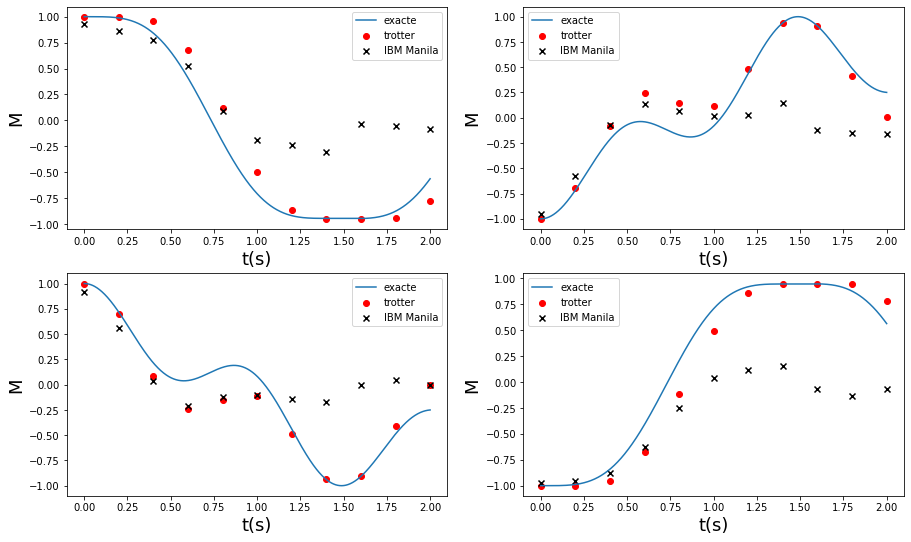

In [20]:
spinstrotter=np.load('spinsquantum.npy')
fig, axes = plt.subplots(p, 2,figsize=(15,9))
for i in range(p):
    y=[magnetizacio_exacta(hamiltonia_exacte,i+1,item) for item in t]
    axes[i][0].plot(t,np.real(y),label='exacte')
    a=[magnetizacio_trotter(i+1,l) for l in range(pasos)]
    axes[i][0].scatter(tt,np.real(a),label='trotter',color='red')
    axes[i][0].scatter(tt,spinstrotter[nombre_spins-1-i],label='IBM Manila',marker="x",color='black')
    axes[i][0].legend()
    axes[i][0].set_xlabel('t(s)', fontsize=18)
    axes[i][0].set_ylabel('M', fontsize=18)
for i in range(p):
    y=[magnetizacio_exacta(hamiltonia_exacte,i+1+p,item) for item in t]
    axes[i][1].plot(t,np.real(y),label='exacte')
    a=[magnetizacio_trotter(i+1+p,l) for l in range(pasos)]
    axes[i][1].scatter(tt,np.real(a), label='trotter',color='red')
    axes[i][1].scatter(tt,spinstrotter[nombre_spins-1-i-p],label='IBM Manila',marker="x",color='black')
    axes[i][1].legend()
    axes[i][1].set_xlabel('t(s)', fontsize=18)
    axes[i][1].set_ylabel('M', fontsize=18)
fig.savefig('4quant')

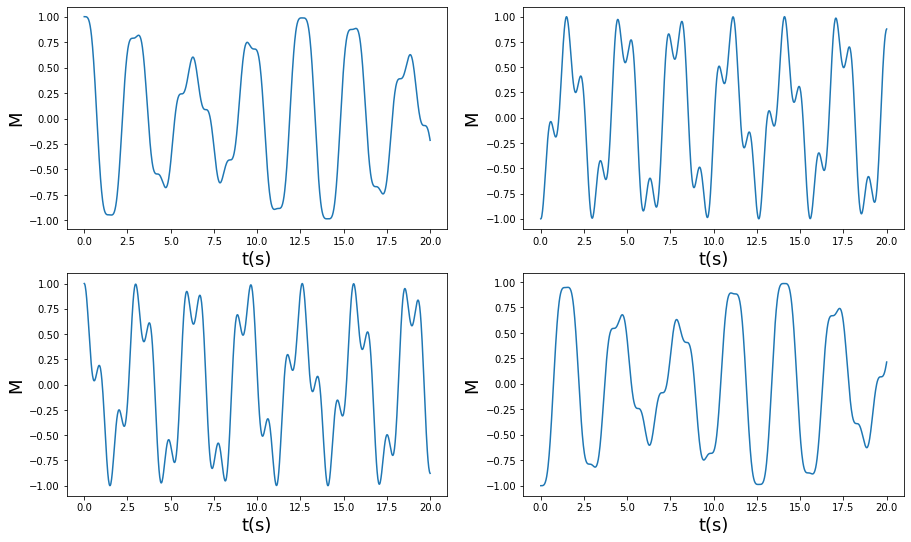

In [18]:
t2=np.linspace(0,20,1000)
fig, axes = plt.subplots(p, 2,figsize=(15,9))
for i in range(p):
    y=[magnetizacio_exacta(hamiltonia_exacte,i+1,item) for item in t2]
    axes[i][0].plot(t2,np.real(y),label='exacte')
    axes[i][0].set_xlabel('t(s)', fontsize=18)
    axes[i][0].set_ylabel('M', fontsize=18)
for i in range(p):
    y=[magnetizacio_exacta(hamiltonia_exacte,i+1+p,item) for item in t2]
    axes[i][1].plot(t2,np.real(y),label='exacte')
    axes[i][1].set_xlabel('t(s)', fontsize=18)
    axes[i][1].set_ylabel('M', fontsize=18)

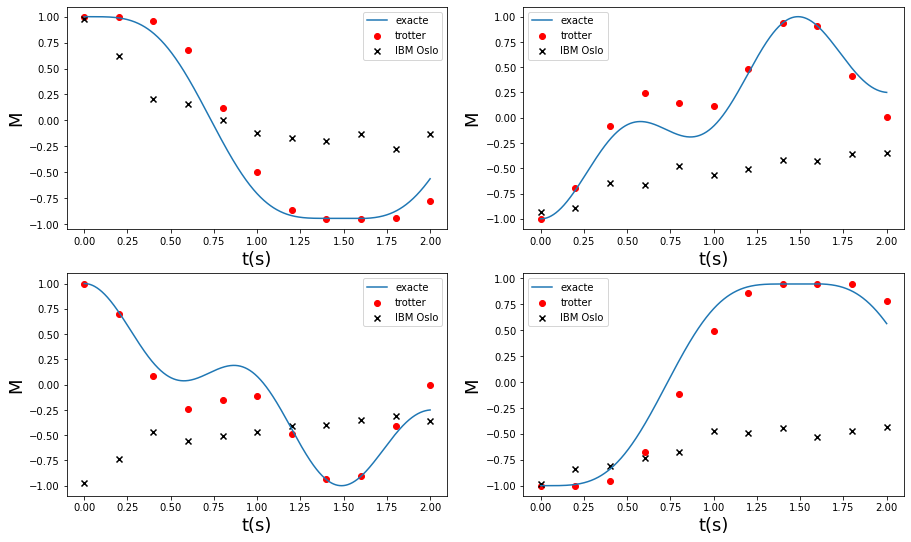

In [19]:
spinstrotter=np.load('spinsquantum6.npy')
fig, axes = plt.subplots(p, 2,figsize=(15,9))
for i in range(p):
    y=[magnetizacio_exacta(hamiltonia_exacte,i+1,item) for item in t]
    axes[i][0].plot(t,np.real(y),label='exacte')
    a=[magnetizacio_trotter(i+1,l) for l in range(pasos)]
    axes[i][0].scatter(tt,np.real(a),label='trotter',color='red')
    axes[i][0].scatter(tt,spinstrotter[nombre_spins-1-i],label='IBM Oslo',marker='x',color='black')
    axes[i][0].legend()
    axes[i][0].set_xlabel('t(s)', fontsize=18)
    axes[i][0].set_ylabel('M', fontsize=18)
for i in range(p):
    y=[magnetizacio_exacta(hamiltonia_exacte,i+1+p,item) for item in t]
    axes[i][1].plot(t,np.real(y),label='exacte')
    a=[magnetizacio_trotter(i+1+p,l) for l in range(pasos)]
    axes[i][1].scatter(tt,np.real(a), label='trotter',color='red')
    axes[i][1].scatter(tt,spinstrotter[nombre_spins-1-i-p],label='IBM Oslo',marker='x',color='black')
    axes[i][1].legend()
    axes[i][1].set_xlabel('t(s)', fontsize=18)
    axes[i][1].set_ylabel('M', fontsize=18)
#fig.savefig('oslo6')

##### 